In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
data_path = "./data/batting_2015_2024.csv"
data = pd.read_csv(data_path)
print('Loaded:', data_path)
print('Shape:', data.shape)

Loaded: batting_2015_2024.csv
Shape: (14051, 321)


## Data Overview
Shows basic information: shape, data types, decriptive statistics. To have better understanding

In [ ]:
print("\nData Types")
print(data.dtypes)
print("\nFirst 10 Row")
print(data.head(10))
print('\nDESCRIPTIVE STATISTICS (NUMERIC):')
print(data.describe().transpose())
print('\nDESCRIPTIVE STATISTICS (OBJECT)')
print(data.describe(include=['object']).transpose())


Data Types
IDfg        int64
Season      int64
Name       object
Team       object
Age         int64
           ...   
xBA       float64
xSLG      float64
xwOBA     float64
L-WAR     float64
season      int64
Length: 321, dtype: object

First 10 Row
    IDfg  Season              Name Team  Age    G   AB   PA    H   1B  ...  \
0  11579    2015      Bryce Harper  WSN   22  153  521  654  172   91  ...   
1  10155    2015        Mike Trout  LAA   23  159  575  682  172   93  ...   
2   5038    2015    Josh Donaldson  TOR   29  158  620  711  184  100  ...   
3   4314    2015        Joey Votto  CIN   31  158  545  695  171  107  ...   
4   9218    2015  Paul Goldschmidt  ARI   27  159  567  695  182  109  ...   
5   9256    2015      A.J. Pollock  ARI   27  157  609  673  192  127  ...   
6   9166    2015      Buster Posey  SFG   28  150  557  623  177  130  ...   
7  11493    2015     Manny Machado  BAL   22  162  633  713  181  115  ...   
8  15429    2015       Kris Bryant  CHC   23  1

## Data Quality

In [62]:
dup = data.duplicated().sum()
print('\nNumber of Duplicate rows:', dup)
missing = data.isnull().sum()
print('\nMissing Data Columns:', missing)



Number of Duplicate rows: 0

Missing Data Columns: IDfg          0
Season        0
Name          0
Age           0
G             0
             ..
Dol_($9.5)    0
Dol_($9.6)    0
Dol_($9.7)    0
Dol_($9.8)    0
Dol_($9.9)    0
Length: 1007, dtype: int64


## Data Plot:

Number of numeric columns detected: 317
Plotting columns: ['IDfg', 'Season', 'Age', 'G', 'AB', 'PA', 'H', '1B']


<Figure size 1400x1000 with 0 Axes>

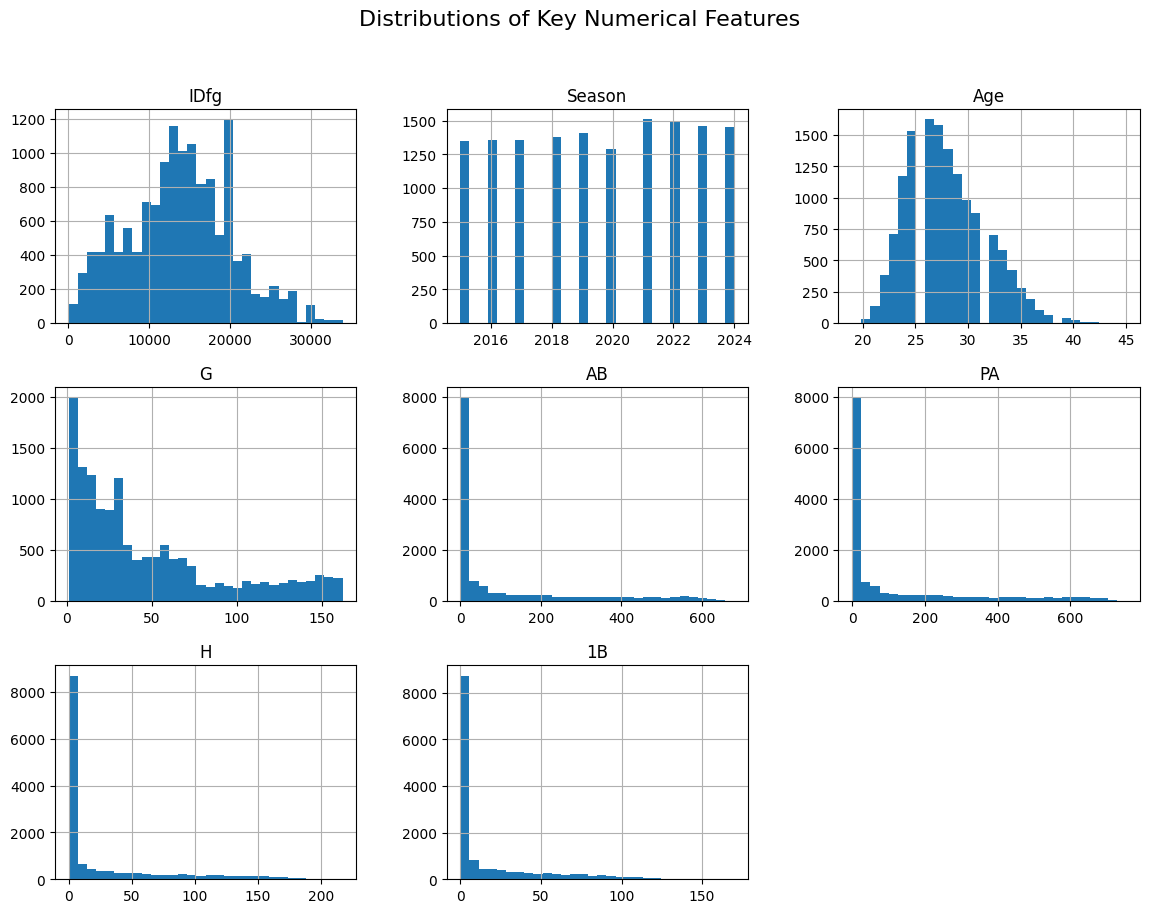

<Figure size 1400x800 with 0 Axes>

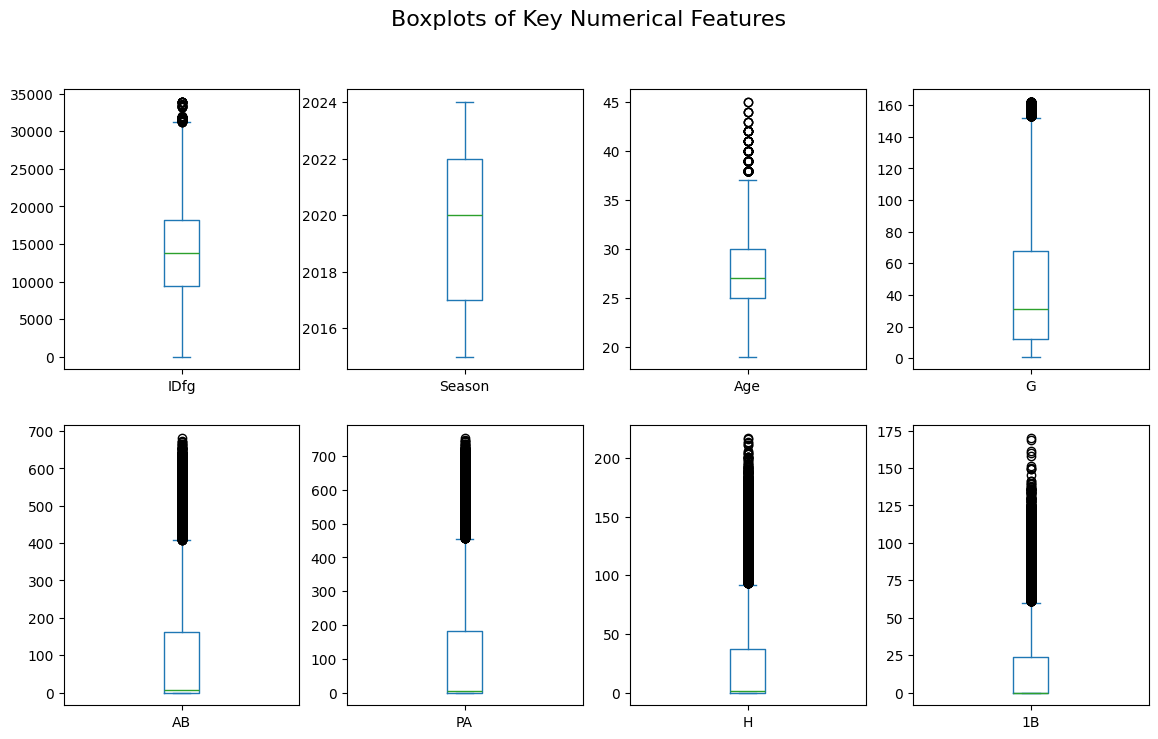

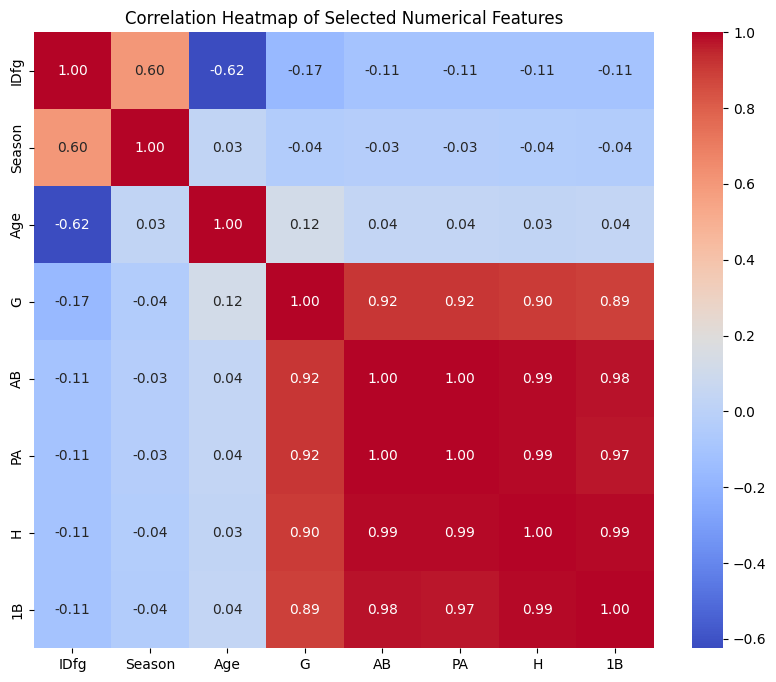

In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print('Number of numeric columns detected:', len(numeric_cols))

plot_cols = [c for c in ['games_played','at_bats','runs','hits','homeruns','rbi','strikeouts','batting_average'] if c in data.columns]
if len(plot_cols) == 0:
    plot_cols = numeric_cols[:8]

print('Plotting columns:', plot_cols)

# Histograms
plt.figure(figsize=(14,10))
data[plot_cols].hist(bins=30, figsize=(14,10))
plt.suptitle('Distributions of Key Numerical Features', fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(14,8))
_ = data[plot_cols].plot(kind='box', subplots=True, layout=(2,4), figsize=(14,8), sharex=False, sharey=False)
plt.suptitle('Boxplots of Key Numerical Features', fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
corr_matrix = data[plot_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

### Discussion 

# Preprocessing

In [ ]:
# # Handle missing data
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())
data = data.dropna(axis=1, how='all')
print('\nAfter Imputation, Missing Data Columns:', data.isnull().sum().sum())

# Normalize numerical features
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
cols_to_scale = [col for col in numeric_cols if col not in ['IDfg', 'Season']]
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

#Hot encode categorical features
one_Hot = ['Team', 'Age Rng','Dol']
for col in one_Hot:
    if col in data.columns:
        data[col] = data[col].astype('category')
data = pd.get_dummies(data, columns=one_Hot, drop_first=True)
print('\nData shape after encoding:', data.shape)

# PCA for dimensionality reduction
id_cols = ['IDfg', 'Season','Name']
features_pca = [col for col in data.columns if col not in id_cols]
X = data[features_pca]
X_id = data[id_cols]
X_id = X_id.reset_index(drop=True)
pca_transformer = PCA(n_components=0.95)
X_pca = pca_transformer.fit_transform(X)
pca_cols = [f'PC_{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_cols)
reduced = pd.concat([X_id, pca_df], axis=1)
print('\nShape after Preprocessing and PCA:', reduced.shape)
print('Number of features after reduction (PCA Components):', pca_df.shape[1])

c:\Users\ajaxm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ajaxm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ajaxm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ajaxm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ajaxm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,


After Imputation, Missing Data Columns: 0

Data shape after encoding: (14051, 1007)

Shape after Preprocessing and PCA: (14051, 144)
Number of features after reduction (PCA Components): 141
